Uploading files

Importing Cleaned Data Files into Colab

In [2]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to select the .zip file from your computer.


Saving hoopsight-ai-main.zip to hoopsight-ai-main.zip


In [3]:
import zipfile
import os

# Replace 'hoopsight-ai-main.zip' with the actual name of the uploaded file if different
with zipfile.ZipFile('hoopsight-ai-main.zip', 'r') as zip_ref:
    zip_ref.extractall('hoopsight-ai-main')


Define Paths & Determine existing files to use:

In [4]:
# Correct root directory path
root_dir = '/content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data'

# Define paths for each metric directory based on the correct root_dir
abl_dir = os.path.join(root_dir, 'abl')
average_scoring_margin_dir = os.path.join(root_dir, 'average_scoring_margin')
defensive_efficiency_dir = os.path.join(root_dir, 'defensive_efficiency')
efg_pct_dir = os.path.join(root_dir, 'efg_pct')
flr_pct_dir = os.path.join(root_dir, 'flr_pct')
opp_flr_pct_dir = os.path.join(root_dir, 'opp_flr_pct')
opponent_efg_pct_dir = os.path.join(root_dir, 'opponent_efg_pct')
sht_pct_dir = os.path.join(root_dir, 'sht_pct')
tov_pct_dir = os.path.join(root_dir, 'tov_pct')
drb_pct_dir = os.path.join(root_dir, 'drb_pct')
win_pct_dir = os.path.join(root_dir, 'win_pct')

# Verify if all directories exist
for dir_path in [abl_dir, average_scoring_margin_dir, defensive_efficiency_dir, efg_pct_dir,
                 flr_pct_dir, opp_flr_pct_dir, opponent_efg_pct_dir, sht_pct_dir, tov_pct_dir,
                 drb_pct_dir, win_pct_dir]:
    if os.path.exists(dir_path):
        print(f"Directory exists: {dir_path}")
    else:
        print(f"Directory missing: {dir_path}")


Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/abl
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/average_scoring_margin
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/defensive_efficiency
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/efg_pct
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/flr_pct
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/opp_flr_pct
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/opponent_efg_pct
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/sht_pct
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/tov_pct
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/drb_pct
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/win_pct


Setup Visualization Library:

In [5]:
!pip install seaborn matplotlib pandas


Verify Existing Directories

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correct root directory path
root_dir = '/content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data'

# Define paths for each metric directory based on the correct root_dir
abl_dir = os.path.join(root_dir, 'abl')
average_scoring_margin_dir = os.path.join(root_dir, 'average_scoring_margin')
defensive_efficiency_dir = os.path.join(root_dir, 'defensive_efficiency')
efg_pct_dir = os.path.join(root_dir, 'efg_pct')
flr_pct_dir = os.path.join(root_dir, 'flr_pct')
opp_flr_pct_dir = os.path.join(root_dir, 'opp_flr_pct')
opponent_efg_pct_dir = os.path.join(root_dir, 'opponent_efg_pct')
sht_pct_dir = os.path.join(root_dir, 'sht_pct')
tov_pct_dir = os.path.join(root_dir, 'tov_pct')
drb_pct_dir = os.path.join(root_dir, 'drb_pct')
win_pct_dir = os.path.join(root_dir, 'win_pct')

# Verify if all directories exist
for dir_path in [abl_dir, average_scoring_margin_dir, defensive_efficiency_dir, efg_pct_dir,
                 flr_pct_dir, opp_flr_pct_dir, opponent_efg_pct_dir, sht_pct_dir, tov_pct_dir,
                 drb_pct_dir, win_pct_dir]:
    if os.path.exists(dir_path):
        print(f"Directory exists: {dir_path}")
    else:
        print(f"Directory missing: {dir_path}")

Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/abl
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/average_scoring_margin
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/defensive_efficiency
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/efg_pct
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/flr_pct
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/opp_flr_pct
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/opponent_efg_pct
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/sht_pct
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/tov_pct
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/drb_pct
Directory exists: /content/hoopsight-ai-main/hoopsight-ai-main/Cleaned_Data/win_pct


In [7]:
def load_metric_data(metric_dir):
    data = pd.DataFrame()

    for team_file in os.listdir(metric_dir):
        if team_file.endswith('.csv'):
            team_data = pd.read_csv(os.path.join(metric_dir, team_file))
            team_data['Team'] = team_file.replace('.csv', '')  # Add team name column
            data = pd.concat([data, team_data], ignore_index=True)

    return data


In [8]:
def plot_violin(data, metric_name):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Year', y='Statistic', data=data)
    plt.title(f'Violin Plot of {metric_name} Over Years')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [9]:
def plot_kde(data, metric_name):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=data, x='Statistic', hue='Year', palette="coolwarm", fill=True, common_norm=False)
    plt.title(f'KDE Plot of {metric_name} Statistics by Year')
    plt.tight_layout()
    plt.show()


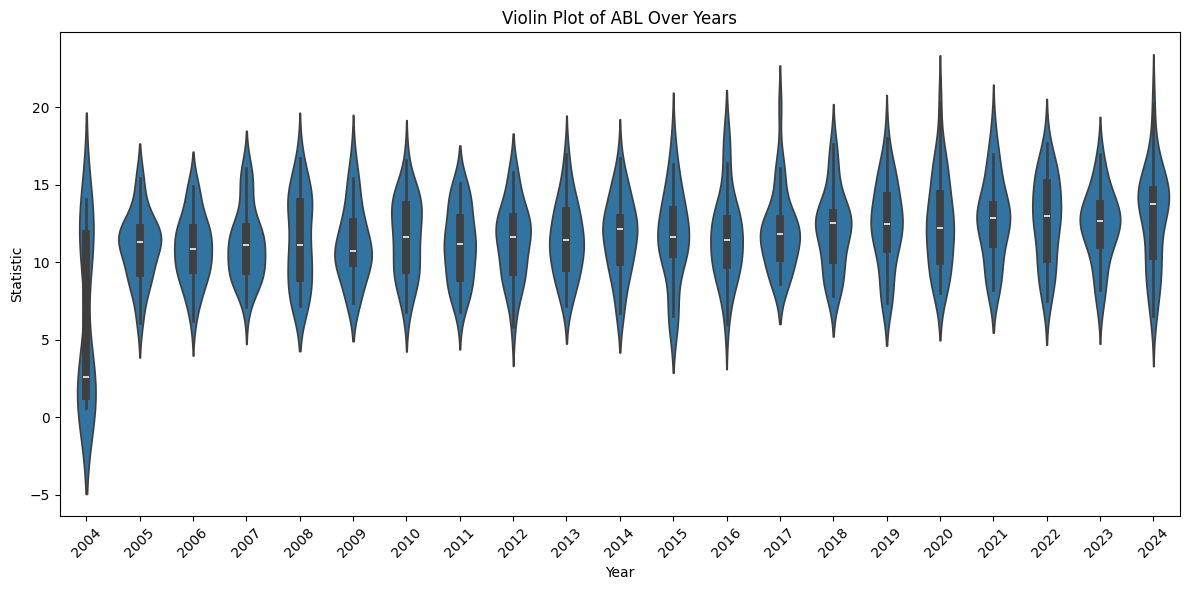

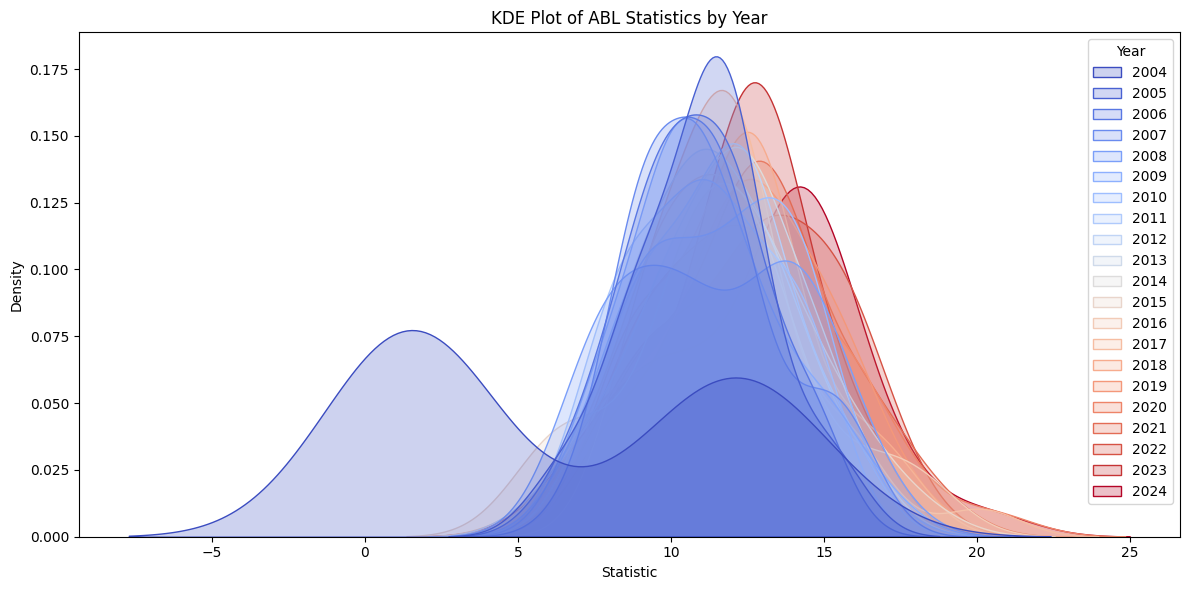

In [10]:
# Load data for the 'abl' metric as an example
metric_data = load_metric_data(abl_dir)

# Generate violin plot
plot_violin(metric_data, 'ABL')

# Generate KDE plot
plot_kde(metric_data, 'ABL')


Visualizing data for ABL


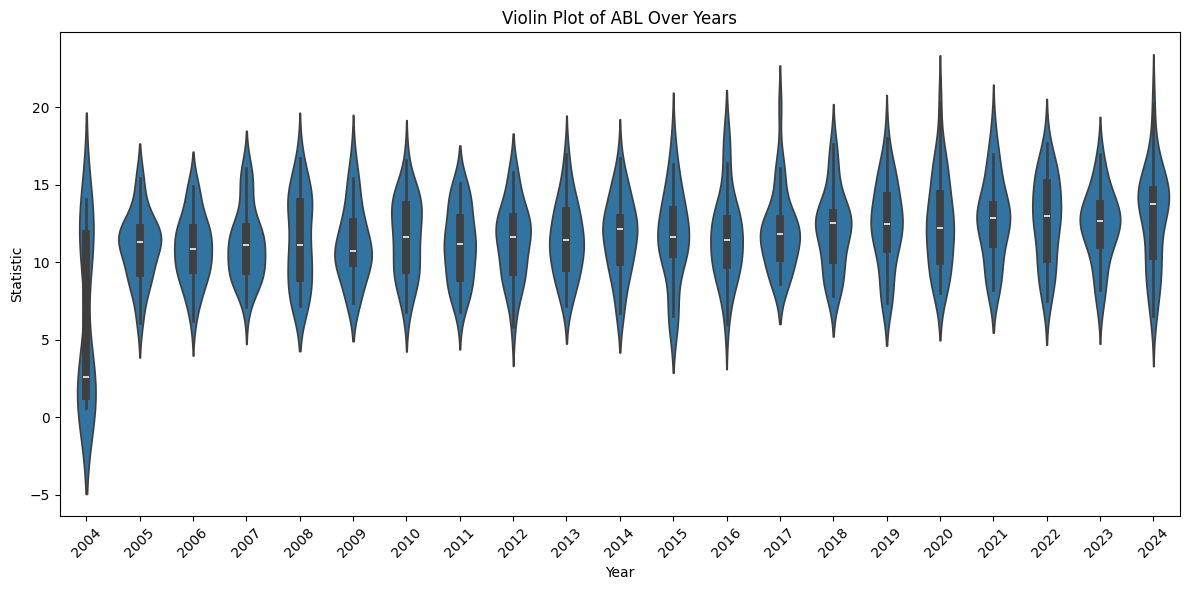

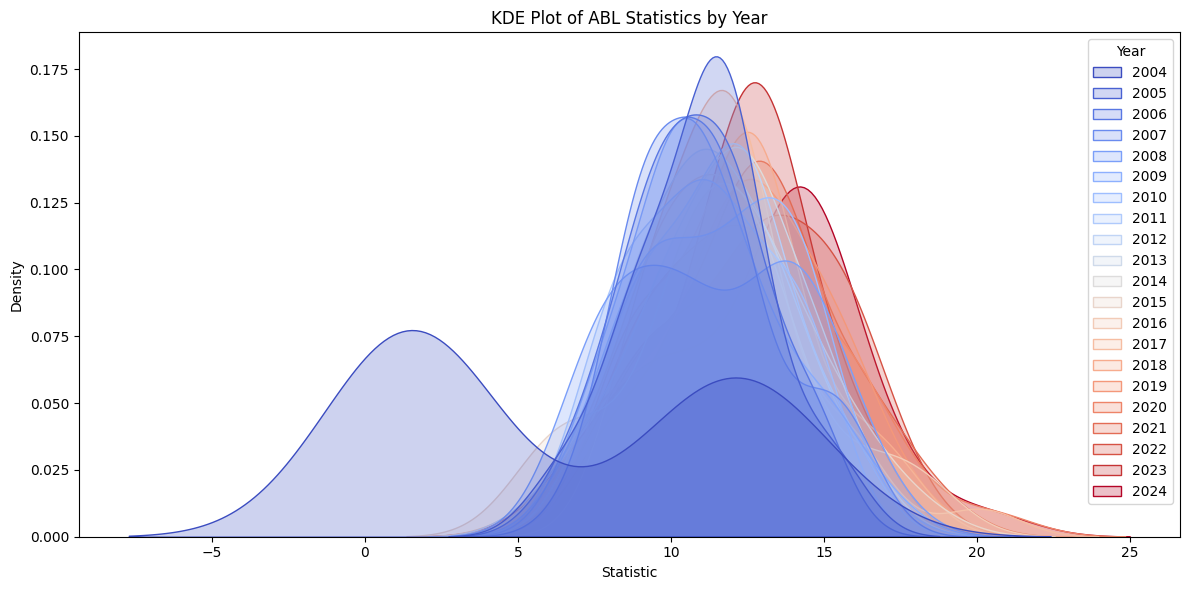

Visualizing data for Average Scoring Margin


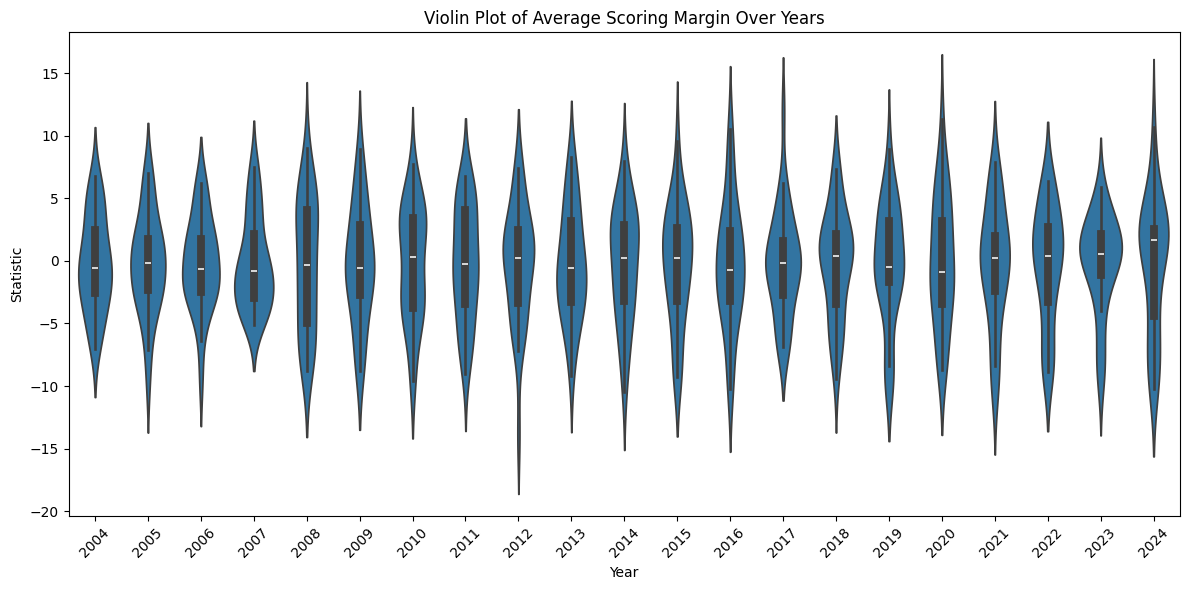

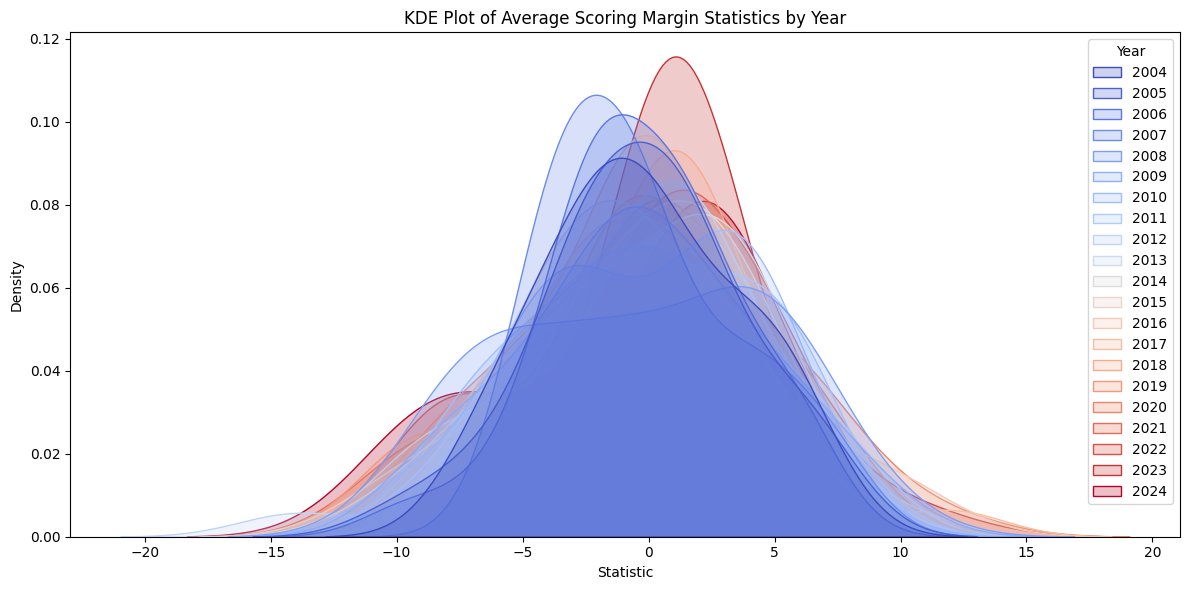

Visualizing data for Defensive Efficiency


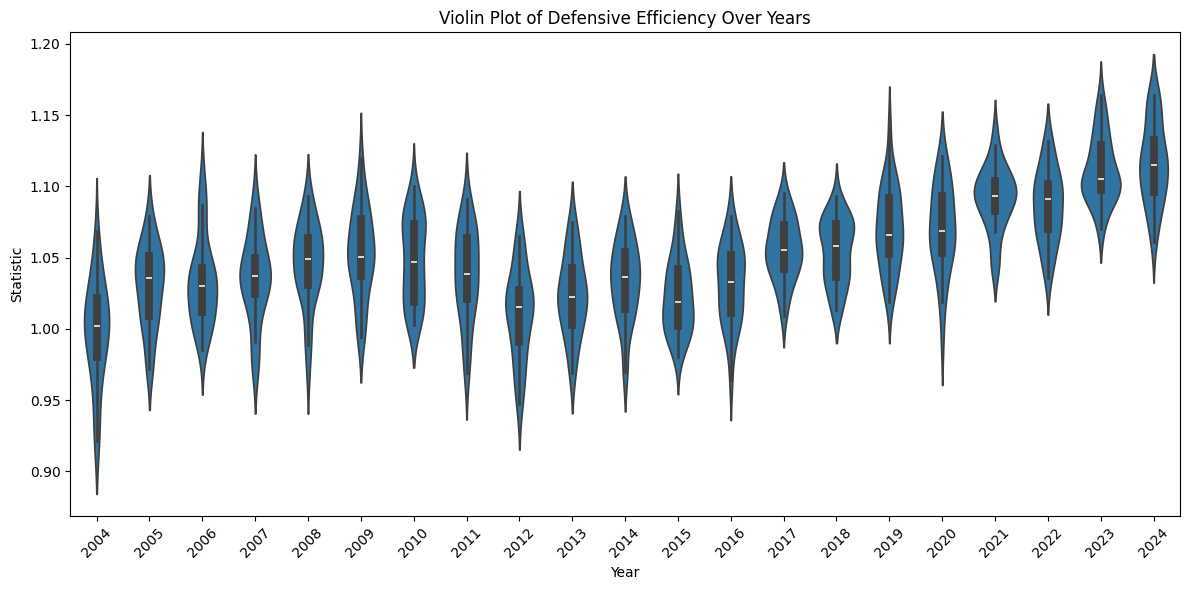

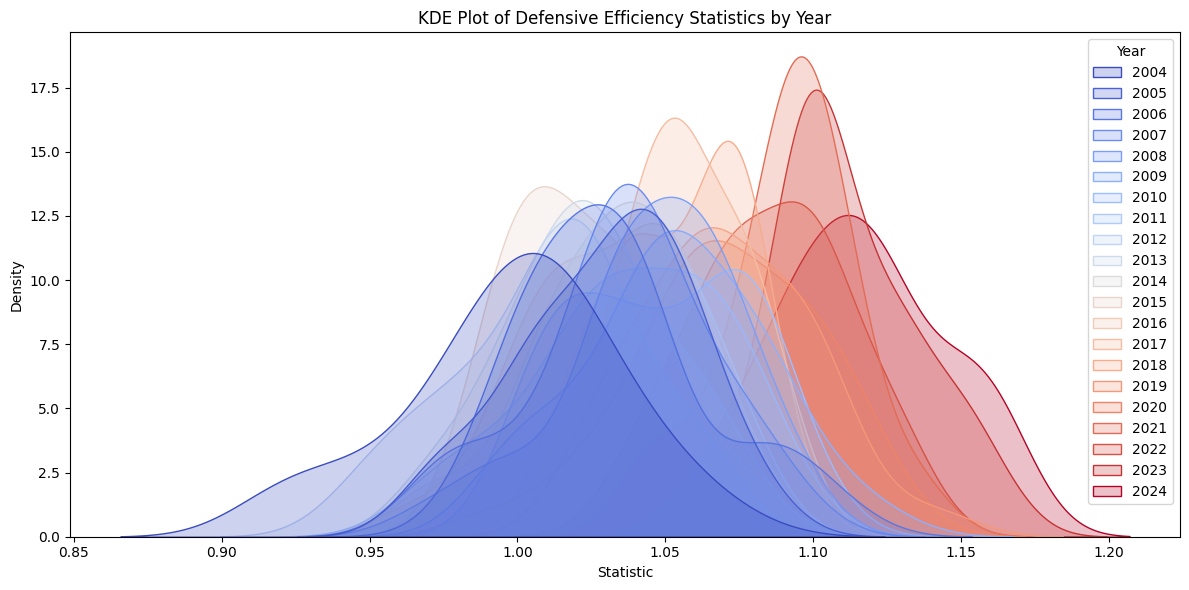

Visualizing data for EFG Percentage


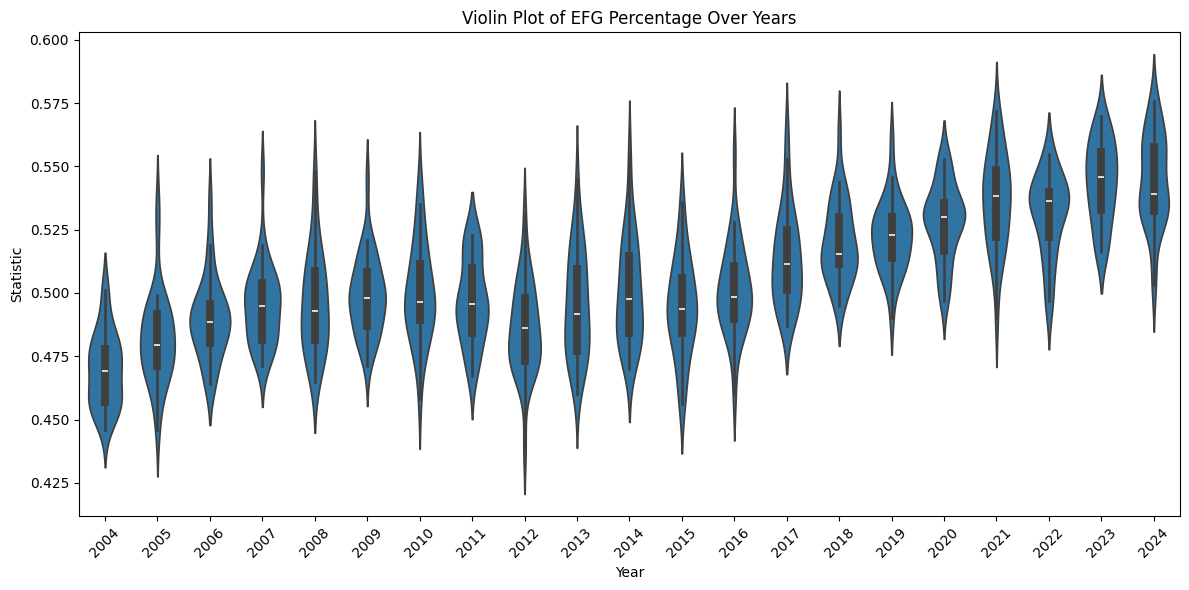

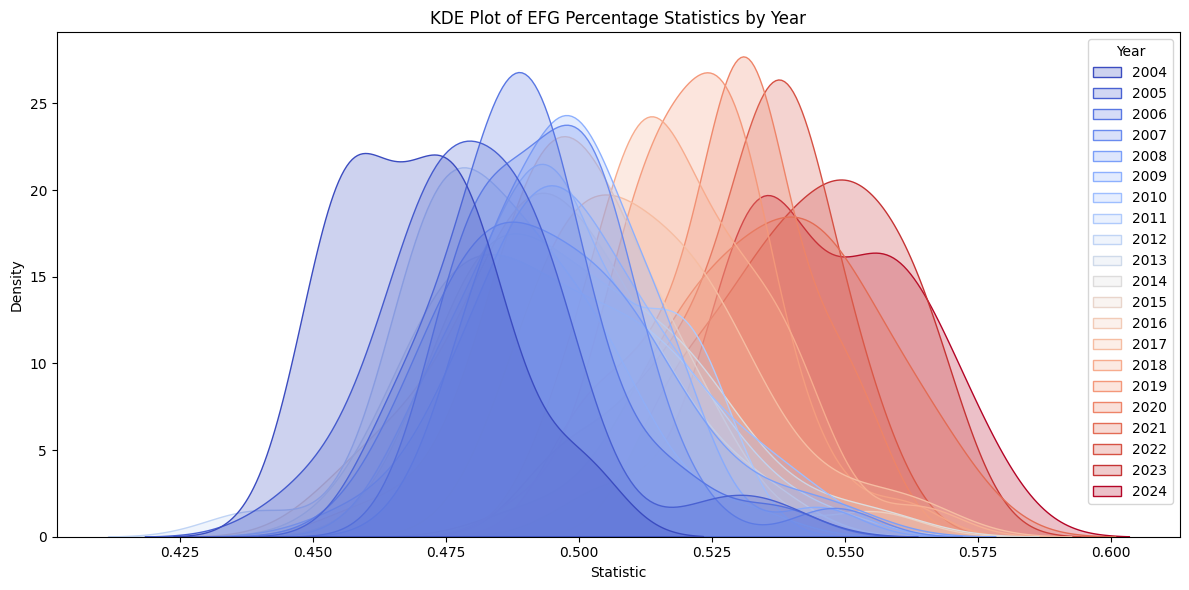

In [11]:
metrics_dirs = {
    'ABL': abl_dir,
    'Average Scoring Margin': average_scoring_margin_dir,
    'Defensive Efficiency': defensive_efficiency_dir,
    'EFG Percentage': efg_pct_dir,
    # Add other metrics here...
}

for metric_name, metric_dir in metrics_dirs.items():
    print(f'Visualizing data for {metric_name}')
    data = load_metric_data(metric_dir)
    plot_violin(data, metric_name)
    plot_kde(data, metric_name)


Second Method of Visualization: